In [1]:
# import numpy as np
# from PIL import Image
# from glob import glob
# from tqdm.notebook import tqdm
# from sklearn.model_selection import train_test_split

# PATH = os.path.join("/home/jupyter/style-transfer/data/comics/raw/")

# face_images = glob(PATH + 'face/*.jpg')
# train, test = train_test_split(face_images, test_size=0.2, random_state=42)
# val, test = train_test_split(test, test_size=0.5, random_state=42)

# def stich_images(paths, split):
#     for f in tqdm(paths):
#         image1 = np.array(Image.open(f))
#         image2 = np.array(Image.open(f.replace('face', 'comics')))

#         stacked_data = np.concatenate((image2, image1), axis=1)
#         stacked_image = Image.fromarray(stacked_data)
        
#         save_path = f.replace('raw/face', f'processed/{split}')
#         stacked_image.save(save_path)

# stich_images(train, 'train')
# stich_images(val, 'val')
# stich_images(test, 'test')

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
 
import os
import time
import datetime
 
from matplotlib import pyplot as plt
from IPython import display

from src.data_loader import data_loader
from src.trainer import Pix2PixModel
from src.networks import pix2pix_generator

In [3]:
train_ds, test_ds = data_loader()

In [4]:
for inp, tar in test_ds.take(5):

    plt.figure(figsize=(6, 3))

    display_list = [inp[0], tar[0]]
    title = ['Real Face', 'Comic Face']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [4]:
model = Pix2PixModel(epochs=2)
encoder = model.train()

In [5]:
encoder.save("../saved_models/pix2pix/comic.keras")

In [7]:
encoder = pix2pix_generator()
encoder.load_weights("../saved_models/pix2pix/comic.keras")

In [19]:
# checkpoint = tf.train.Checkpoint(generator=encoder)
# checkpoint.restore(tf.train.latest_checkpoint("../saved_models/pix2pix/model_ckpts/"))

1/1 [==============================] - 0s 59ms/step


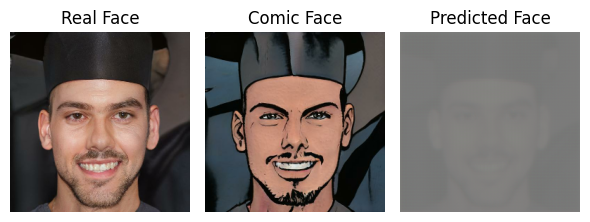

1/1 [==============================] - 0s 52ms/step


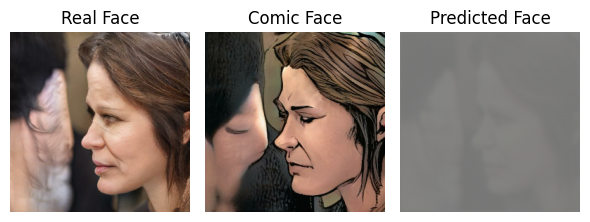

1/1 [==============================] - 0s 51ms/step


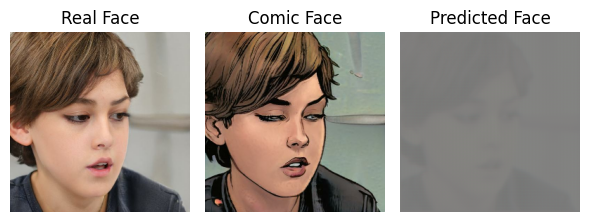

1/1 [==============================] - 0s 52ms/step


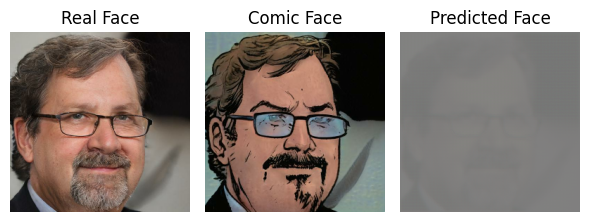

1/1 [==============================] - 0s 55ms/step


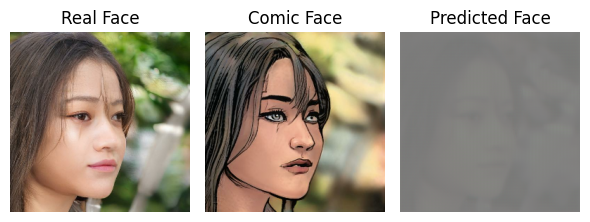

In [8]:
for inp, tar in test_ds.take(5):
    
    p = encoder.predict(inp)

    plt.figure(figsize=(6, 3))

    display_list = [inp[0], tar[0], p[0]]
    title = ['Real Face', 'Comic Face', 'Predicted Face']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()